In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.3044,  1.0000],
        [ 0.3807,  1.0000],
        [-0.0455,  1.0000],
        [-0.8373,  1.0000],
        [ 0.6089,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [6]:
x@a

tensor([ 2.9132,  3.1421,  1.8636, -0.5120,  3.8267,  0.8801,  1.1624,  3.7687,
         3.2011,  2.8328,  1.0839,  3.5596, -0.3839,  1.6679, -0.8707,  0.3042,
         0.3321,  1.2910,  1.4120,  0.9420,  1.7815, -0.6979,  0.5017,  1.7437,
         0.7700,  3.5157,  4.3623,  2.2712,  1.2104, -0.0802, -0.6258,  4.6137,
         3.3367,  0.5063,  1.5171, -0.5365,  4.9991,  2.1180,  2.0976,  3.9354,
         2.6059,  3.2790, -0.9478,  0.3339,  3.6814,  3.1741, -0.9027,  2.4096,
         2.4312,  1.0368,  0.5976,  4.3898, -0.3147,  1.0854, -0.5504,  0.5006,
         0.5173,  1.7569,  4.2324,  0.9008,  2.4770,  3.0225,  3.6092,  4.6643,
        -0.5468,  4.3667,  0.3752,  1.3448, -0.9024,  4.2215,  1.5313,  1.3649,
        -0.1122,  2.8758, -0.8725,  1.8015,  3.9425,  0.3799,  2.1931,  4.8771,
         2.4801, -0.5585,  3.1453,  3.8532,  3.0380, -0.8708,  3.3806, -0.6155,
        -0.5330,  2.6097, -0.3340, -0.4633,  0.3707,  2.6084,  2.5504,  1.5480,
        -0.4829, -0.6048, -0.7069,  0.25

In [7]:
y = x@a + torch.rand(n)

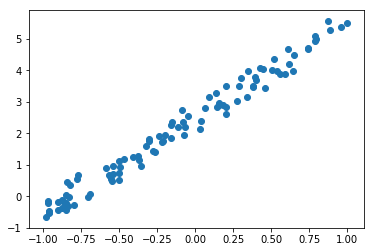

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(6.3132)

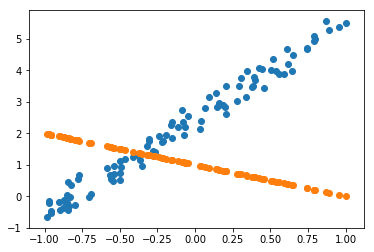

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [15]:
lr = 1e-1
for t in range(100): update()

tensor(6.3132, grad_fn=<MeanBackward1>)
tensor(1.6258, grad_fn=<MeanBackward1>)
tensor(0.4857, grad_fn=<MeanBackward1>)
tensor(0.1786, grad_fn=<MeanBackward1>)
tensor(0.0955, grad_fn=<MeanBackward1>)
tensor(0.0731, grad_fn=<MeanBackward1>)
tensor(0.0670, grad_fn=<MeanBackward1>)
tensor(0.0653, grad_fn=<MeanBackward1>)
tensor(0.0649, grad_fn=<MeanBackward1>)
tensor(0.0648, grad_fn=<MeanBackward1>)


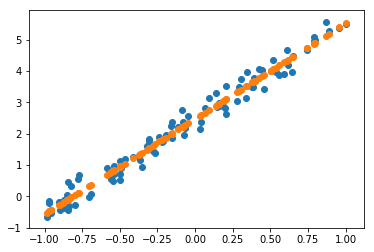

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [17]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [18]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.